# .............................................MNIST IN KERAS......................................................

### Load Data from Keras and split into Training and Testing set.

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import mnist

# number of classes is 10 as the output is 0-9 digits
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


C:\Users\ravic\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


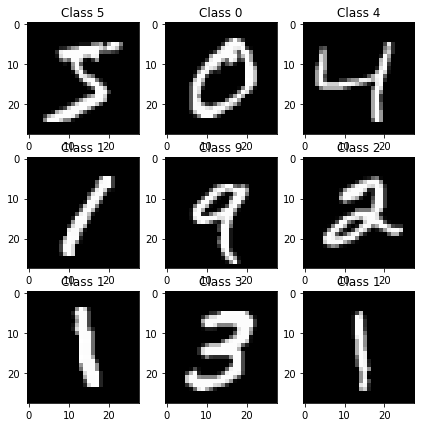

In [23]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

### Reshape the Input data (X_Train,X_test) as vectors with shape (60000,784) So input node neurons is 784

In [24]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### We have to convert the output (Target) data into one hot vectors 
### Digit 4 becomes 0000100000

In [25]:
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, nb_classes)

Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


### Our Neural Network Architecture with one input layer with 784 nodes, two hidden layers with 512 nodes each and 1 output layer with 10 nodes each node giving probability of a digit being that number.

<img src="mnistnn.png">

#### Both hidden layers has relu activation function.
#### Model also has dropout units after each hidden layer to prevent the model from overfitting and memorizing the training data.
#### Finally the output layer has a softmax function with gives probabilities based on the scores in output layer so that the model predicts the digit in the input image.

<img src="relu.png">

In [26]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
__________

### We use rmsprop optimizer and categorical cross entropy i.e -∑ (y*log(y^)) where y is true label and y^ is predicted probability.

In [27]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 13s - loss: 0.2478 - acc: 0.9242    
Epoch 2/10
60000/60000 [==============================] - 12s - loss: 0.1023 - acc: 0.9677    
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.0747 - acc: 0.9771    
Epoch 4/10
60000/60000 [==============================] - 13s - loss: 0.0601 - acc: 0.9817    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.0498 - acc: 0.9846    
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.0432 - acc: 0.9870    
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.0381 - acc: 0.9886    
Epoch 8/10
60000/60000 [==============================] - 12s - loss: 0.0352 - acc: 0.9895    
Epoch 9/10
60000/60000 [==============================] - 13s - loss: 0.0316 - acc: 0.9912    
Epoch 10/10
60000/60000 [==============================] - 13s - loss: 0.0301 - acc: 0.9913    


In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.073489727258
Test accuracy: 0.9836
